## L2
他にも、色々なConversation Memoryがあります。

* ConversationTokenBufferMemory
* ConversationEntityMemory
* ConversationKGMemory
* VectorStoreRetrieverMemory

ConversationSummaryBufferMemoryは、ConversationSummaryMemoryとConversationTokenBufferMemoryを組み合わせたもので、`max_tokens`に合わせて要約と直近の対話履歴を提供できます。
便利そうですが、QAチャットボットなどでは、「忘れてくれないこと」が不便かもしれませんね。

ConversationEntityMemoryは、対話履歴中のEntityとその説明を提供します。
固有名詞が多い会話とかに使うんですかね。家族構成などを含む会話だと役立つかもしれません。

ConversationKGMemoryは、ナレッジグラフを提供します。これもEntityと同様ですね。EntityよりEntity間の関係に注目したいときに役立ちそうです。あまり有効な使い道が浮かびません。。

VectorStoreRetrieverMemoryは、過去のやりとりのEmbeddingを検索して提供するものです。関連する部分をそのまま持って来れるので、Entityリストやナレッジグラフより使いやすそうです。

Entityリスト・ナレッジグラフ・ベクトルストアは、会話の中で生成していくというよりも、会話の前に準備しておく使い方かもしれません。

### ConversationKGMemory

ということで、ConversationKGMemoryを使ってみました。
めちゃめちゃ手こずりました。。

In [1]:
from langchain.chat_models import ChatOpenAI
from langchain.prompts.prompt import PromptTemplate
from langchain.chains import ConversationChain
from langchain.memory import ConversationKGMemory


import networkx as nx
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

In [5]:
llm = ChatOpenAI(temperature=0)

template = """The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. 
If the AI does not know the answer to a question, it truthfully says it does not know. The AI ONLY uses information contained in the "Relevant Information" section and does not hallucinate.

Relevant Information:
{knowledge}

Human: {input}
AI:"""

prompt = PromptTemplate(
    input_variables=["knowledge", "input"], template=template
)

memory = ConversationKGMemory(
    llm=llm, input_key="input", memory_key="knowledge"
)

conversation_with_kg = ConversationChain(
    llm=llm, memory=memory,
    prompt=prompt, verbose=True, 
)

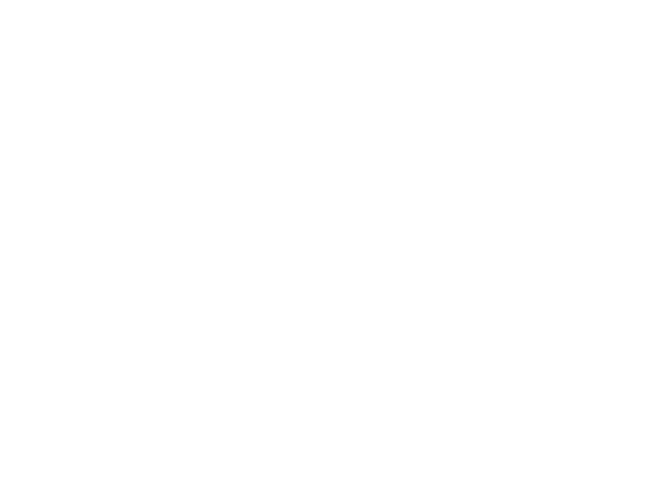

In [6]:
nx.draw(conversation_with_kg.memory.kg._graph, with_labels = True)

In [7]:
text = """\
I introduce you Ken's family members.
Ken's mother lives in England. \
Ken's father lives in America. \
Ken's brother lives in India.\
"""
conversation_with_kg.predict(input=text)



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: I introduce you Ken's family members.
Ken's mother lives in England. Ken's father lives in America. Ken's brother lives in India.
AI:

> Finished chain.


"That's great! It's nice to meet Ken's family members. So, Ken's mother lives in England, his father lives in America, and his brother lives in India. It sounds like they are spread out across different countries. Do you know if Ken has any other family members or if they all live in these three countries?"

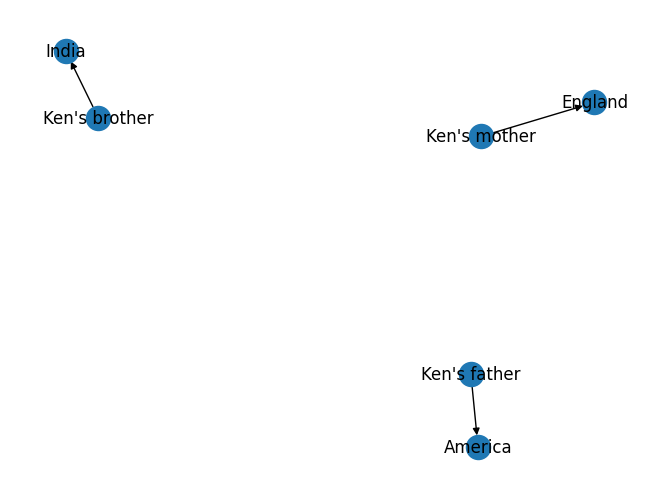

In [8]:
nx.draw(conversation_with_kg.memory.kg._graph, with_labels = True)

In [9]:
text = """\
What is the time difference \
between where Ken's brother and Ken's mother live?
"""
conversation_with_kg.predict(input=text)



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: What is the time difference between where Ken's brother and Ken's mother live?

AI:

> Finished chain.


"Ken's brother lives in New York, which is in the Eastern Time Zone (UTC-5). Ken's mother lives in Los Angeles, which is in the Pacific Time Zone (UTC-8). Therefore, there is a time difference of 3 hours between where Ken's brother and Ken's mother live."

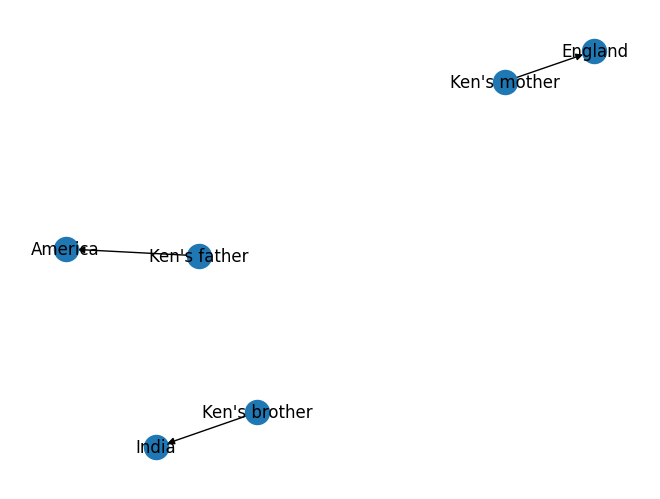

In [14]:
nx.draw(conversation_with_kg.memory.kg._graph, with_labels = True)